In [1]:
import datetime

import pandas
import numpy

import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.dates import date2num, DateFormatter, MonthLocator, YearLocator, DayLocator

%matplotlib inline

In [2]:
# Read the symH/AsyH indices using Pandas!
sym_df = pandas.read_csv("data/Asy_processed.txt", delim_whitespace=True)
sym_df.head()

,datetimeStr,AsyD,AsyH,SymD,SymH
0,20110101-00-00,17.0,13.0,1.0,-10.0
1,20110101-00-01,17.0,13.0,1.0,-10.0
2,20110101-00-02,17.0,13.0,1.0,-10.0
3,20110101-00-03,17.0,13.0,1.0,-10.0
4,20110101-00-04,17.0,13.0,1.0,-10.0


In [3]:
# Check the datatypes of the different columns
sym_df.dtypes

datetimeStr     object
AsyD           float64
AsyH           float64
SymD           float64
SymH           float64
dtype: object

In [4]:
# Note the datetimeStr column is listed as "object"
# It means the column is being interpreted by Pandas
# as a string column (and not surprisingly so)!
# We'll convert this into a more Python/Pandas friendly
# datetime column
sym_df["datetime"] = pandas.to_datetime(sym_df["datetimeStr"], format="%Y%m%d-%H-%M")
sym_df.head()

,datetimeStr,AsyD,AsyH,SymD,SymH,datetime
0,20110101-00-00,17.0,13.0,1.0,-10.0,2011-01-01 00:00:00
1,20110101-00-01,17.0,13.0,1.0,-10.0,2011-01-01 00:01:00
2,20110101-00-02,17.0,13.0,1.0,-10.0,2011-01-01 00:02:00
3,20110101-00-03,17.0,13.0,1.0,-10.0,2011-01-01 00:03:00
4,20110101-00-04,17.0,13.0,1.0,-10.0,2011-01-01 00:04:00


In [5]:
# Check the time interval covered by the data
print("Start date -->", sym_df["datetime"].min())
print("End date -->", sym_df["datetime"].max())

Start date --> 2011-01-01 00:00:00
End date --> 2015-01-01 23:59:00


In [6]:
# Lets use only 2 years of data!
first_date = datetime.datetime(2012,1,1)
last_date = datetime.datetime(2014,1,1)
sym_df = sym_df[
    (sym_df["datetime"] >= first_date) &\
    (sym_df["datetime"] <= last_date)
]

/home/bharat/anaconda3/envs/data_analysis/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


Text(0, 0.5, 'SymH Index')

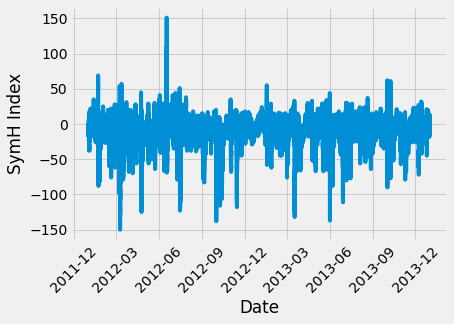

In [7]:
# Lets plot the data and see what it looks like!!!
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
ax.plot(sym_df["datetime"], sym_df["SymH"])
# rotate the xtick labels to make the plots more readable!
ax.set_xticklabels(ax.get_xticks(), rotation = 45)
# Format the xtick labels such that they show year and month!
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))
# Place a label every three months!!!
ax.xaxis.set_major_locator(MonthLocator(interval=3))
# set the axis labels
ax.set_xlabel("Date")
ax.set_ylabel("SymH Index")

In [8]:
# Select a given time period to get a clearer picture!
start_date = datetime.datetime(2013,3,1)
end_date = datetime.datetime(2013,4,1)
sel_data_df = sym_df[
    (sym_df["datetime"] >= start_date) &\
    (sym_df["datetime"] <= end_date)
]

/home/bharat/anaconda3/envs/data_analysis/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


Text(0, 0.5, 'SymH Index')

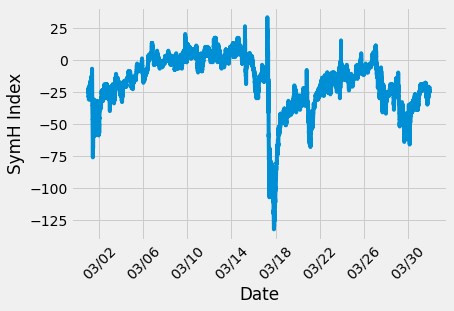

In [9]:
# Lets plot the selected data now!!!
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
ax.plot(sel_data_df["datetime"], sel_data_df["SymH"])
# rotate the xtick labels to make the plots more readable!
ax.set_xticklabels(ax.get_xticks(), rotation = 45)
# Now format the xtick labels such that they show month and day!
ax.xaxis.set_major_formatter(DateFormatter('%m/%d'))
# Place a label every 4 days!!!
ax.xaxis.set_major_locator(DayLocator(interval=4))
# set the axis labels
ax.set_xlabel("Date")
ax.set_ylabel("SymH Index")

In [10]:
# Now let's get back to the task of making a 
# plot that shows the SymH index more clearly
# We'll try plotting a daily summary of the index!
sym_df["date"] = sym_df["datetime"].dt.date
# Aggrgate by day!

# g2 = df.groupby(["Description","CustomerID"],as_index=False).agg({'Quantity':{np.max,np.min,np.mean}})
# g2.columns = ["Description","CustomerID","maxQ","minQ",'meanQ']
# {'Quantity':}

aggregation = {
    "SymH": {numpy.max,numpy.min,numpy.median}
}

agg_df = sym_df.groupby(["date"],as_index=False).agg(aggregation)
agg_df.columns = ["date","max_symh","min_symh",'median_symh']
agg_df.head()

,date,max_symh,min_symh,median_symh
0,2012-01-01,-1.0,-18.0,-9.0
1,2012-01-02,17.0,-10.0,2.0
2,2012-01-03,-8.0,-38.0,-25.0
3,2012-01-04,-1.0,-21.0,-11.0
4,2012-01-05,22.0,-12.0,-2.0


/home/bharat/anaconda3/envs/data_analysis/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator


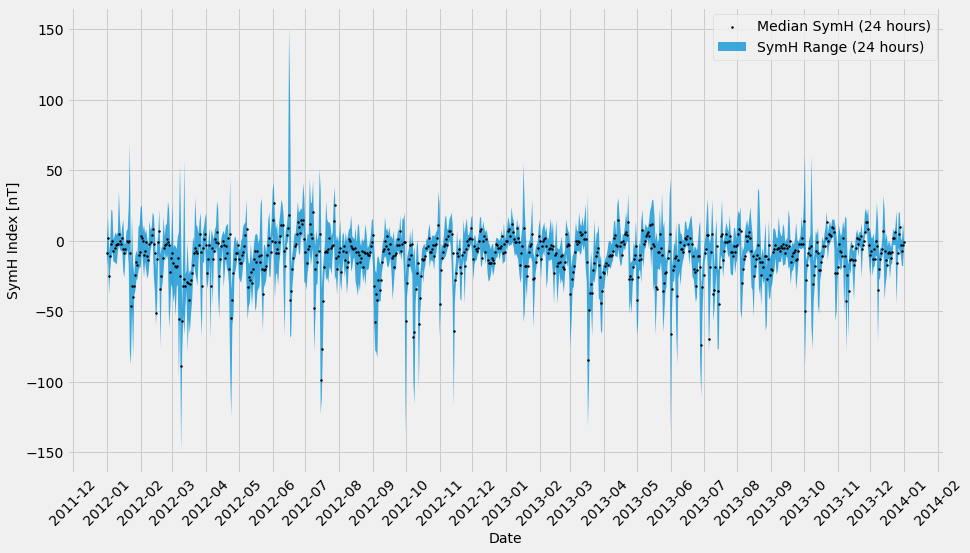

In [11]:
plt.style.use("fivethirtyeight")
f = plt.figure(figsize=(14, 8))
ax = f.add_subplot(1,1,1)

med_plt = ax.scatter(x=agg_df["date"].values,\
             y=agg_df["median_symh"].values, marker='.',\
           color='k', s=14,zorder=8, label="Median SymH (24 hours)")

rng_plt = ax.fill_between(agg_df["date"].values, 
                    y1=agg_df['min_symh'],
                    y2=agg_df['max_symh'],
                    alpha=0.75,label="SymH Range (24 hours)",\
                    zorder=7)

ax.set_ylabel("SymH Index [nT]", fontsize = 14)
ax.set_xlabel('Date', fontsize = 14)
# rotate the xtick labels to make the plots more readable!
ax.set_xticklabels(ax.get_xticks(), rotation = 45)
# Now format the xtick labels such that they show month and day!
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))
# Place a label every three months!!!
ax.xaxis.set_major_locator(MonthLocator(interval=1))
ax.legend()
# f.savefig("../data/sw/symh_summ.png", bbox_inches='tight')

In [12]:
# Identify dates with min SymH Values!
# In other words when were the strongest storms
# during this interval observed!!!!
# Let's assume we have a storm happening whenever 
# SymH drops below -50 nT!!!
storm_df = agg_df[agg_df["min_symh"] <= -50]
# Oder the values by the strongest storms!
storm_df.sort_values(by=['min_symh'])

,date,max_symh,min_symh,median_symh
68,2012-03-09,4.0,-150.0,-89.0
274,2012-10-01,-26.0,-138.0,-57.0
517,2013-06-01,44.0,-137.0,-66.0
441,2013-03-17,33.0,-132.0,-85.0
114,2012-04-24,-35.0,-125.0,-55.0
...,...,...,...,...
481,2013-04-26,-15.0,-52.0,-27.0
676,2013-11-07,8.0,-52.0,-18.0
383,2013-01-18,25.0,-51.0,-18.0
669,2013-10-31,3.0,-51.0,-23.0


In [13]:
# Exercise - Repeat a similar analysis for another index?
# perhaps Dst or AL?

In [14]:
# Merging datasets - Correlation between IMF (Bz), Vsw and an index?

In [15]:
# download/plot IMF data
# work with SSUSI imager